1.Importing the library

In [1]:
import pandas as pd

2. import our data set

In [2]:
data=pd.read_excel("Heart Disease.xlsx")

3. Taking Care for missing Values 

In [6]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

4. Taking Care for duplicate values

In [7]:
data.duplicated().any()

True

In [8]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
data=data.drop_duplicates()

In [12]:
data.duplicated().any()

False

5. Data Preprocessing

In [13]:
cat_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique()<=10:
        cat_val.append(column)
    else:
        cont_val.append(column)
    

In [14]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

6. Encoding of categorical variable

In [16]:
cat_val.remove("sex")
cat_val.remove("target")
data=pd.get_dummies(data,columns=cat_val,drop_first=True)

In [17]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


7.Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [29]:
x=data.drop("target",axis=1)
y=data["target"]

8. Spliting the data into train and Test

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [27]:
x_train.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
108,-1.596432,1,1.163283,-0.454829,1.374576,-0.899544,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
479,0.396267,1,-0.205463,-0.590310,-0.812118,0.997780,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
348,-1.264315,1,0.022661,0.009677,-0.287311,-0.813302,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1
541,-1.153610,1,0.478910,-0.222576,1.330842,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
288,0.396267,0,-0.661712,1.809640,0.980971,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [28]:
x_test.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


9.Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [34]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred1=log.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred1)

0.7520661157024794

10. Support Vector Classifier (SVC)

In [40]:
from sklearn import svm

In [42]:
svm=svm.SVC()

In [43]:
svm.fit(x_train,y_train)

SVC()

In [44]:
y_pred2=svm.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.7396694214876033

11. K neighbours Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
KN=KNeighborsClassifier()
KN.fit(x_train,y_train)

KNeighborsClassifier()

In [58]:
y_pred3=KN.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test,y_pred3)

0.78099173553719

In [81]:
score=[]
for K in range (1,40):
    KN=KNeighborsClassifier(n_neighbors=K)
    KN.fit(x_test,y_test)
    y_pred=KN.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [82]:
score

[1.0,
 0.8925619834710744,
 0.9173553719008265,
 0.871900826446281,
 0.8636363636363636,
 0.8471074380165289,
 0.871900826446281,
 0.8429752066115702,
 0.8512396694214877,
 0.8388429752066116,
 0.8347107438016529,
 0.8305785123966942,
 0.8388429752066116,
 0.8305785123966942,
 0.8388429752066116,
 0.8347107438016529,
 0.8347107438016529,
 0.8347107438016529,
 0.8305785123966942,
 0.8264462809917356,
 0.8223140495867769,
 0.8264462809917356,
 0.8264462809917356,
 0.8140495867768595,
 0.8099173553719008,
 0.8181818181818182,
 0.8099173553719008,
 0.8140495867768595,
 0.8140495867768595,
 0.8057851239669421,
 0.7975206611570248,
 0.8181818181818182,
 0.8223140495867769,
 0.8305785123966942,
 0.8140495867768595,
 0.8181818181818182,
 0.8057851239669421,
 0.8140495867768595,
 0.7975206611570248]

11. Decision Tree classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt=DecisionTreeClassifier()

In [89]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
y_pred4=dt.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred4)

0.6983471074380165

In [93]:
from sklearn.metrics import precision_score,recall_score

In [95]:
recall_score(y_test,y_pred4)

0.8015267175572519

12. Random Forest Classifier.

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf=RandomForestClassifier()

In [98]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
y_pred5=rf.predict(x_test)

In [103]:
accuracy_score(y_test,y_pred5)

0.7851239669421488

13. Gradient boosting classifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [109]:
y_pred6=GB.predict(x_test)

In [111]:
accuracy_score(y_test,y_pred6)

0.743801652892562

In [114]:
final_data=pd.DataFrame({"Models":["LR","SVC","KNN","DT","RF","GB"],
                        "ACC":[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [115]:
final_data

,Models,ACC
0,LR,0.752066
1,SVC,0.739669
2,KNN,0.780992
3,DT,0.698347
4,RF,0.785124
5,GB,0.743802


In [116]:
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

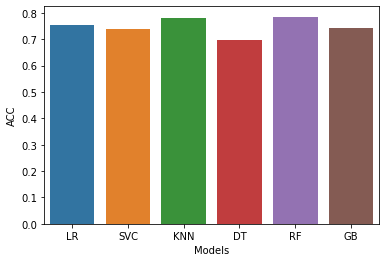

In [119]:
sns.barplot(final_data["Models"],final_data["ACC"])

In [120]:
final_data=pd.DataFrame({"Models":["LR","SVC","KNN","DT","RF","GB"],"ACC":[accuracy_score(y_test,y_pred1),
                                                                          accuracy_score(y_test,y_pred2),
                                                                          accuracy_score(y_test,y_pred3),
                                                                          accuracy_score(y_test,y_pred4),
                                                                          accuracy_score(y_test,y_pred5),
                                                                          accuracy_score(y_test,y_pred6)]})

In [121]:
final_data

,Models,ACC
0,LR,0.752066
1,SVC,0.739669
2,KNN,0.780992
3,DT,0.698347
4,RF,0.785124
5,GB,0.743802


In [122]:
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

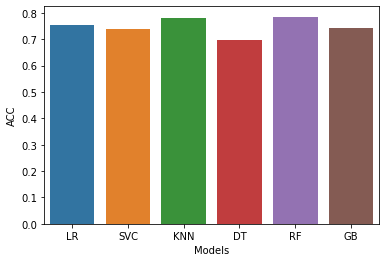

In [124]:
sns.barplot(final_data["Models"],final_data["ACC"])

In [125]:
# now based on the accuracy result Random Forest is the best model to use 
x=data.drop("target",axis=1)
y=data["target"]

In [126]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [128]:
#Let train Random forest from the entire data set
from sklearn.ensemble import RandomForestClassifier

In [146]:
import pandas as pd
data1=pd.read_excel("Heart Disease.xlsx")

In [147]:
x=data1.drop("target",axis=1)
y=data1["target"]

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

Prediction on a new data set

In [151]:
New_data=pd.DataFrame({"Age":52,
                      "sex":1,
                      "cp":0,
                      "trestbps":125,
                      "chol":212,
                      "fbs":0,
                      "restecg":1.0,
                      "thalach":168,
                      "exang":0,
                      "oldpeak":1,
                      "slope":2,
                      "ca":2,
                      "thal":3,
                    },index=[0])

In [153]:
New_data

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1.0,168,0,1,2,2,3


In [154]:
rf.predict(New_data)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
Feature names seen at fit time, yet now missing:
- age

  warnings.warn(message, FutureWarning)


array([0], dtype=int64)

In [155]:
p=rf.predict(New_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")
    

    

No Disease


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
Feature names seen at fit time, yet now missing:
- age

  warnings.warn(message, FutureWarning)
